<a href="https://colab.research.google.com/github/globalaihub/introduction-to-machine-learning/blob/main/Logistic%20Regression/logistic_regression.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

                                    All rights reserved © Global AI Hub 2020 
![](img/logo.png)


# Logistic Regression 

Logistic regression is a fundamental classification technique. It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression. Logistic regression is fast and relatively uncomplicated, and it’s convenient for you to interpret the results. Although it’s essentially a method for binary classification, it can also be applied to multiclass problems.

You’ll need an understanding of the sigmoid function and the natural logarithm function to understand what logistic regression is and how it works.

This image shows the sigmoid function (or S-shaped curve) of some variable 𝑥:

<img src="img/s.jpeg" />

The sigmoid function has values very close to either 0 or 1 across most of its domain. This fact makes it suitable for application in classification methods.

## Single-Variate Logistic Regression

Single-variate logistic regression is the most straightforward case of logistic regression. There is only one independent variable (or feature), which is 𝐱 = 𝑥. This figure illustrates single-variate logistic regression:

<img src="img/logis.jpg" />

Here, you have a given set of input-output (or 𝑥-𝑦) pairs, represented by green circles. These are your observations. Remember that 𝑦 can only be 0 or 1. For example, the leftmost green circle has the input 𝑥 = 0 and the actual output 𝑦 = 0. The rightmost observation has 𝑥 = 9 and 𝑦 = 1.

Logistic regression finds the weights 𝑏₀ and 𝑏₁ that correspond to the maximum log-likelihood function (LLF). These weights define the logit 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥, which is the dashed black line. They also define the predicted probability $p(x) = 1 / (1 + exp(−𝑓(𝑥)))$, shown here as the full black line. In this case, the threshold 𝑝(𝑥) = 0.5 and 𝑓(𝑥) = 0 corresponds to the value of 𝑥 slightly higher than 3. This value is the limit between the inputs with the predicted outputs of 0 and 1.

## Logistic Regression in Python

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
np.arange(10).reshape(-1, 1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [3]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [4]:
model = LogisticRegression(random_state = 42)

In [5]:
model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
print("Classes: ", model.classes_)
print("Intercept: ",model.intercept_)
print("Coef: ",model.coef_)

Classes:  [0 1]
Intercept:  [-4.12617727]
Coef:  [[1.18109091]]


$\hat{y} = f(x) = 1.18109091*x_1 -4.12617727$

In [12]:
print("Probability estimates:","\n",model.predict_proba(x))

Probability estimates: 
 [[0.98411203 0.01588797]
 [0.95003074 0.04996926]
 [0.85370936 0.14629064]
 [0.64173546 0.35826454]
 [0.35475873 0.64524127]
 [0.1443924  0.8556076 ]
 [0.04924876 0.95075124]
 [0.01565079 0.98434921]
 [0.00485659 0.99514341]
 [0.00149573 0.99850427]]


In [13]:
model.predict(x)
print("Actual (class) predictions:","\n",model.predict(x))

Actual (class) predictions: 
 [0 0 0 0 1 1 1 1 1 1]


In [15]:
#Confusion Matrix
y_pred = model.predict(x)
confusion_matrix(y, y_pred)

array([[4, 0],
       [0, 6]], dtype=int64)

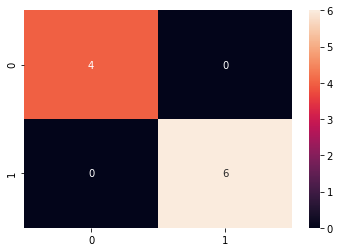

In [16]:
import seaborn as sns

cm = confusion_matrix(y, model.predict(x))
sns.heatmap(cm, annot=True)

In [17]:
y_pred = model.predict(x)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [25]:
#Changing Hyperparameters
model = LogisticRegression(solver='liblinear', C=0.5, random_state=0)
model.fit(x, y)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
print("Intercept of the function:","\n",model.intercept_)

Intercept of the function: 
 [-0.61167085]


In [28]:
print("Weights of the function:","\n",model.coef_)

Weights of the function: 
 [[0.41299976]]


In [30]:
print("Probability estimates:","\n",model.predict_proba(x))

Probability estimates: 
 [[0.64832185 0.35167815]
 [0.54950505 0.45049495]
 [0.44662201 0.55337799]
 [0.34811656 0.65188344]
 [0.26108668 0.73891332]
 [0.18948992 0.81051008]
 [0.13396721 0.86603279]
 [0.09284959 0.90715041]
 [0.06342763 0.93657237]
 [0.04288806 0.95711194]]


In [24]:
print("Actual (class) predictions:","\n",model.predict(x))

Actual (class) predictions: 
 [0 0 1 1 1 1 1 1 1 1]


In [23]:
print("Accuracy of the model:",model.score(x, y))

Accuracy of the model: 0.8


In [19]:
#Confusion Matrix
confusion_matrix(y, model.predict(x))

array([[2, 2],
       [0, 6]], dtype=int64)

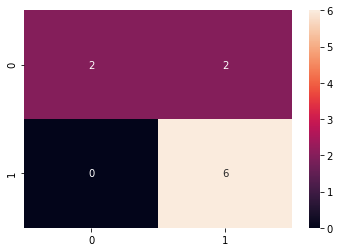

In [32]:
# Visualize confusion matrix with heatmap
sns.heatmap(confusion_matrix(y, model.predict(x)), annot=True)

In [33]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.75      1.00      0.86         6

    accuracy                           0.80        10
   macro avg       0.88      0.75      0.76        10
weighted avg       0.85      0.80      0.78        10



## Real Life Example

In [16]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
X , y = load_breast_cancer(return_X_y=True)
df = pd.DataFrame(X,columns = load_breast_cancer().feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [18]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


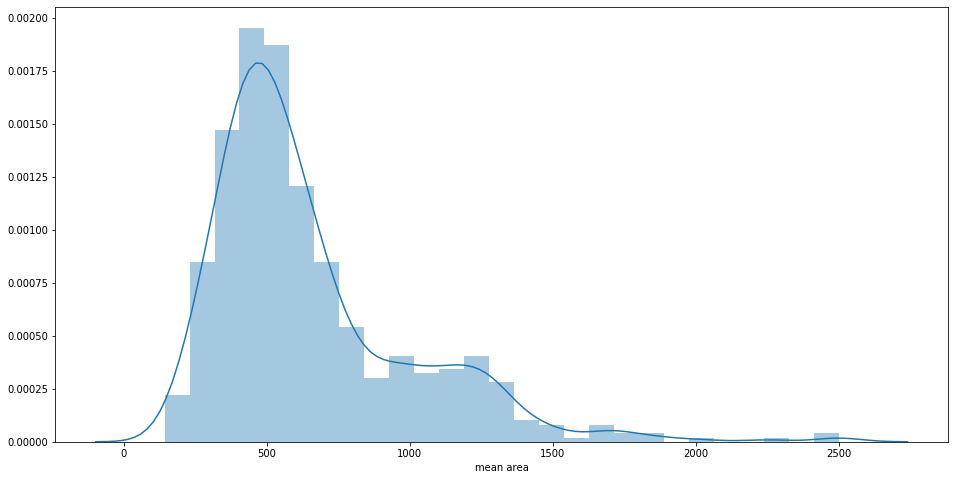

In [19]:
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.distplot(df["mean area"])

In [20]:
# Outlier Detection
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
z

array([[1.09706398, 2.07333501, 1.26993369, ..., 2.29607613, 2.75062224,
        1.93701461],
       [1.82982061, 0.35363241, 1.68595471, ..., 1.0870843 , 0.24388967,
        0.28118999],
       [1.57988811, 0.45618695, 1.56650313, ..., 1.95500035, 1.152255  ,
        0.20139121],
       ...,
       [0.70228425, 2.0455738 , 0.67267578, ..., 0.41406869, 1.10454895,
        0.31840916],
       [1.83834103, 2.33645719, 1.98252415, ..., 2.28998549, 1.91908301,
        2.21963528],
       [1.80840125, 1.22179204, 1.81438851, ..., 1.74506282, 0.04813821,
        0.75120669]])

In [21]:
outliers = list(set(np.where(z > 3)[0]))

len(outliers)

74

In [22]:
new_df = df.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df)

y_new = y[list(new_df["index"])]
len(y_new)

,index,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
3,5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
4,6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321
491,563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
492,564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
493,565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637


495

In [23]:
#Scaling
X_new = new_df.drop('index', axis = 1)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X_new)
X_scaled

array([[0.83424397, 0.38362684, 0.82273105, ..., 0.68863384, 0.3717064 ,
        0.42980015],
       [0.78021978, 0.54926226, 0.79595605, ..., 0.89966679, 0.64240903,
        0.41158614],
       [0.81705445, 0.22037125, 0.84304312, ..., 0.60162903, 0.25062735,
        0.27498103],
       ...,
       [0.89502118, 0.60352213, 0.90674915, ..., 0.82043688, 0.15526976,
        0.20376929],
       [0.80723187, 0.88243693, 0.80703536, ..., 0.60273973, 0.31587202,
        0.14330888],
       [0.59052121, 0.87434555, 0.59560521, ..., 0.52499074, 0.20483061,
        0.29294207]])

In [24]:
from sklearn.model_selection import train_test_split, cross_validate

#Scaling and outlier removed
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_new, test_size=0.3, random_state=42)

models = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(models,X_train,y_train, cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.9595202398800601
Test accuracy: 0.9664429530201343


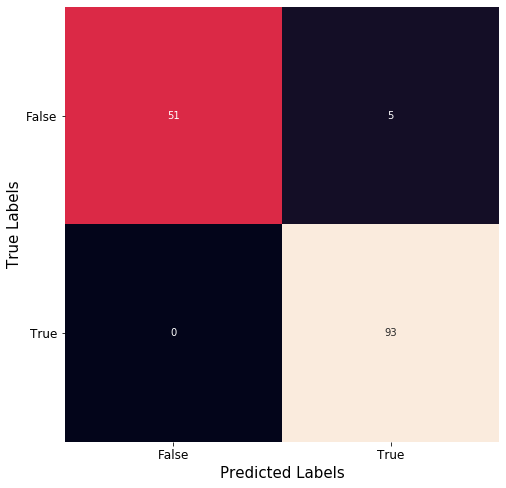

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
pred = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [27]:
# Without any preprocess 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

models = LogisticRegression(random_state=42,n_jobs=-1)
cv = cross_validate(models,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.944691273638642
Test accuracy: 0.9707602339181286


## Evaluation Metrics

![](img/acc.png)

F1-score = $F_1 = 2 * \frac{precision\,*\,recall}{precision\, +\, recall}$

Find all evaluation metrics in sklearn library by clicking [here.](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, cv["estimator"][0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [34]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

final_model = cv["estimator"][0]

y_pred = final_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy: 0.9707602339181286
Precision: 0.963963963963964
Recall: 0.9907407407407407
F1 Score: 0.9771689497716894


**When to use Accuracy Metric**  
When there are roughly equal number of samples belonging to each class.  
<br>
**When to use Precision**  
Precision is a good measure to determine, when the costs of False Positive is high. For instance, email spam detection. In email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model.  
<br>
**When to use Recall**  
For instance, in fraud detection or sick patient detection. If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.  
<br>
**When to use F1 Score**  
F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).

### ROC (Receiver Operating Characteristic) & AUC (Area Under the Curve)
AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.  

**True Positive Rate (TPR)** = $TP\,/\,(TP+FN)$  
**False Positive Rate (FPR)** = $FP\,/\,(FP+FN)$

![](img/roc.png)

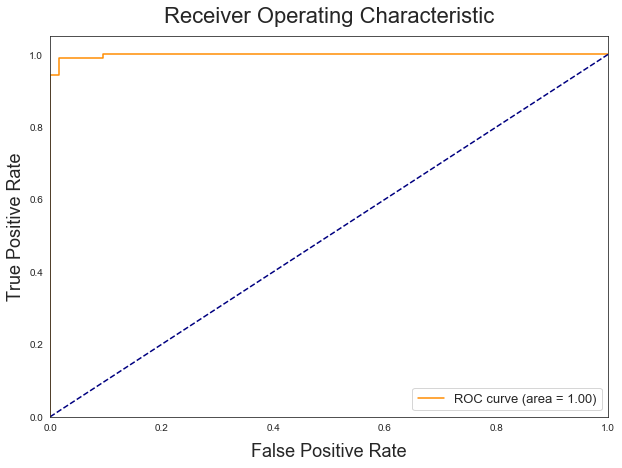

In [40]:
from sklearn.metrics import roc_curve, auc

y_pred_prop = final_model.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Receiver Operating Characteristic',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

# Resources
https://www.analyticsvidhya.com/blog/2020/10/how-to-choose-evaluation-metrics-for-classification-model/  
https://www.kaggle.com/vipulgandhi/how-to-choose-right-metric-for-evaluating-ml-model
